In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

Data Collection

In [2]:
energy_dataset = pd.read_csv('/content/energy_categorical.csv')

In [3]:
energy_dataset.shape

(921, 5)

In [4]:
energy_dataset.head()

,timestamp,household_id,energy_consumption_kWh,future_consumption_kWh,target_category
0,1/1/2024 0:00,1,0.208750,0.238588,Medium
1,1/1/2024 0:05,1,0.238588,0.256830,High
2,1/1/2024 0:10,1,0.256830,0.206643,Medium
3,1/1/2024 0:15,1,0.206643,0.243535,Medium
4,1/1/2024 0:20,1,0.243535,0.242188,Medium


In [5]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   timestamp               921 non-null    object 
 1   household_id            921 non-null    int64  
 2   energy_consumption_kWh  921 non-null    float64
 3   future_consumption_kWh  921 non-null    float64
 4   target_category         921 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 36.1+ KB


In [6]:
energy_dataset.isnull().sum()

,0
timestamp,0
household_id,0
energy_consumption_kWh,0
future_consumption_kWh,0
target_category,0


In [7]:
energy_dataset.describe()

,household_id,energy_consumption_kWh,future_consumption_kWh
count,921.000000,921.000000,921.000000
mean,3.002172,0.200649,0.200636
std,1.415748,0.074028,0.074016
min,1.000000,0.052868,0.052868
25%,2.000000,0.134713,0.134713
50%,3.000000,0.200601,0.200041
75%,4.000000,0.272544,0.272544
max,5.000000,0.340917,0.340917


In [40]:
energy_dataset['timestamp'] = pd.to_datetime(energy_dataset['timestamp'])

In [41]:
energy_dataset['hour'] = energy_dataset['timestamp'].dt.hour

In [42]:
energy_dataset_clean = energy_dataset.drop(columns=['target_category'])

In [44]:
energy_dataset_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   timestamp               921 non-null    datetime64[ns]
 1   household_id            921 non-null    int64         
 2   energy_consumption_kWh  921 non-null    float64       
 3   future_consumption_kWh  921 non-null    float64       
 4   Cluster                 921 non-null    int32         
 5   hour                    921 non-null    int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1)
memory usage: 36.1 KB


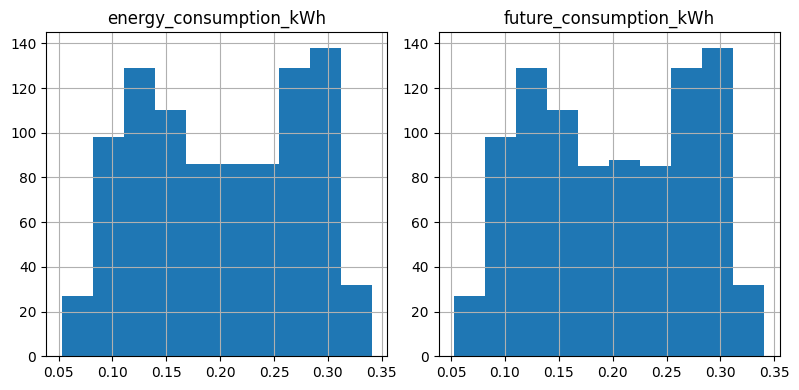

In [45]:
energy_dataset[['energy_consumption_kWh','future_consumption_kWh']].hist(figsize=(8,4))
plt.tight_layout()
plt.show()


Korelasi Antar FItur

In [46]:
energy_dataset[['energy_consumption_kWh','future_consumption_kWh']].corr()

,energy_consumption_kWh,future_consumption_kWh
energy_consumption_kWh,1.000000,0.921482
future_consumption_kWh,0.921482,1.000000


Feature Selection

In [50]:
features = ['energy_consumption_kWh','future_consumption_kWh','hour']

X = energy_dataset_clean[features]
X.head()

,energy_consumption_kWh,future_consumption_kWh,hour
0,0.208750,0.238588,0
1,0.238588,0.256830,0
2,0.256830,0.206643,0
3,0.206643,0.243535,0
4,0.243535,0.242188,0


Normalisasi

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Menentukan Jumlah Klaseter Menggunakan Elbow Method

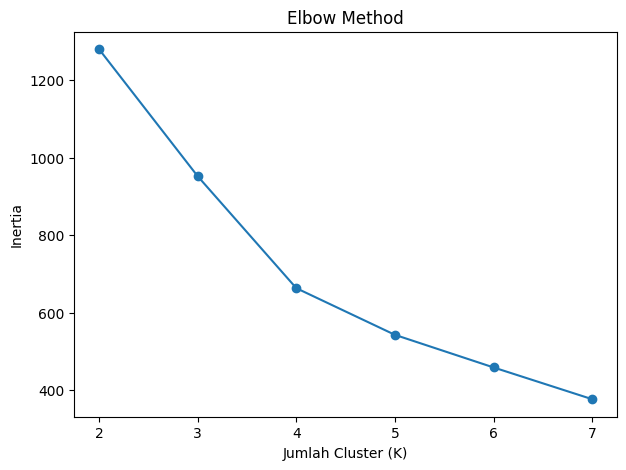

In [52]:
inertia = []

K_range = range(2, 8)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Silhoute Score

In [54]:
for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.455
K=3, Silhouette Score=0.392
K=4, Silhouette Score=0.386
K=5, Silhouette Score=0.373


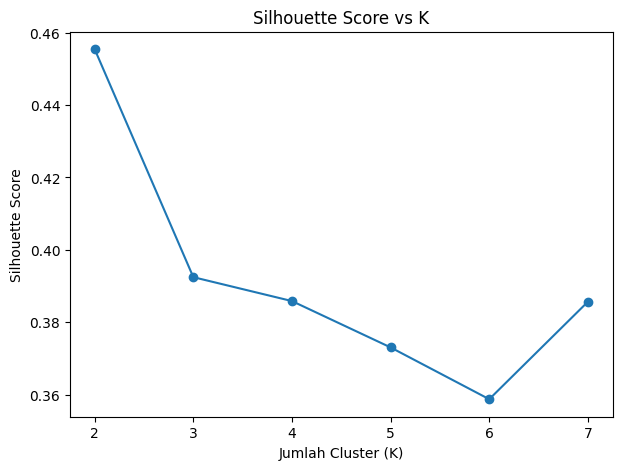

In [55]:
silhouette_scores = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7,5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.show()


Proses Clustering Kmeans

In [57]:
kmeans = KMeans(n_clusters=3, random_state=42)
energy_dataset_clean['Cluster'] = kmeans.fit_predict(X_scaled)

In [61]:
dbi_score = davies_bouldin_score(X_scaled, energy_dataset_clean['Cluster'])
dbi_score


np.float64(0.9364418735879253)

In [63]:
cluster_summary = energy_dataset_clean.groupby('Cluster')[features].mean()
cluster_summary

,energy_consumption_kWh,future_consumption_kWh,hour
Cluster,,,
0,0.141257,0.143269,12.093878
1,0.270302,0.269907,5.816471
2,0.140684,0.139340,4.701195


Evaluasi model Silhoutte Score

---



In [64]:
silhouette_avg = silhouette_score(X_scaled, energy_dataset_clean['Cluster'])
silhouette_avg

np.float64(0.39243831445856847)

Evaluasi Hasil Clustering

In [65]:
dbi_score = davies_bouldin_score(X_scaled, energy_dataset_clean['Cluster'])
dbi_score

np.float64(0.9364418735879253)

Visualisasi Cluster

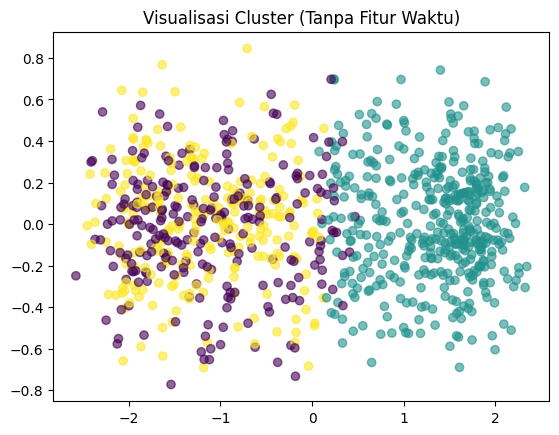

In [69]:
X_no_hour = energy_dataset_clean[['energy_consumption_kWh', 'future_consumption_kWh']]
X_no_hour_scaled = scaler.fit_transform(X_no_hour)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_no_hour_scaled)

plt.scatter(X_pca2[:,0], X_pca2[:,1], c=energy_dataset_clean['Cluster'], alpha=0.6)
plt.title('Visualisasi Cluster (Tanpa Fitur Waktu)')
plt.show()


Interpretasi Cluster

1.   Cluster 0 → Konsumsi rendah (zona hemat energi)
2.   Cluster 1 → Konsumsi sedang
3.   Cluster 2 → Konsumsi tinggi (zona boros energi)



In [74]:
energy_dataset.groupby('Cluster')[features].mean()

,energy_consumption_kWh,future_consumption_kWh,hour
Cluster,,,
0,0.120849,0.121148,8.436047
1,0.282857,0.282750,5.906061
2,0.201956,0.201632,7.141700


TABEL STATISTIK TIAP CLUSTER

In [73]:
cluster_stats = energy_dataset.groupby('Cluster')[[
    'energy_consumption_kWh',
    'future_consumption_kWh'
]].agg(['mean', 'min', 'max', 'std'])

cluster_stats


energy_consumption_kWh                                \
                          mean       min       max       std   
Cluster                                                        
0                     0.120849  0.052868  0.189940  0.026951   
1                     0.282857  0.218718  0.340917  0.023136   
2                     0.201956  0.137168  0.268670  0.028178   

        future_consumption_kWh                                
                          mean       min       max       std  
Cluster                                                       
0                     0.121148  0.052868  0.184327  0.027372  
1                     0.282750  0.214978  0.340917  0.023417  
2                     0.201632  0.119329  0.269459  0.028793

In [72]:
evaluation_results = []

for k in range(2, 8):  # K = 2 sampai 7
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, labels_temp)
    db_score = davies_bouldin_score(X_scaled, labels_temp)

    evaluation_results.append({
        'K': k,
        'Silhouette Score': sil_score,
        'Davies-Bouldin Index': db_score
    })

evaluation_energy_dataset = pd.DataFrame(evaluation_results)
evaluation_energy_dataset


,K,Silhouette Score,Davies-Bouldin Index
0,2,0.455436,0.873984
1,3,0.392438,0.936442
2,4,0.385833,0.923992
3,5,0.373025,0.884762
4,6,0.358708,0.857519
5,7,0.385645,0.874085


GRAFIK SILHOUETTE SCORE vs JUMLAH CLUSTER (K)

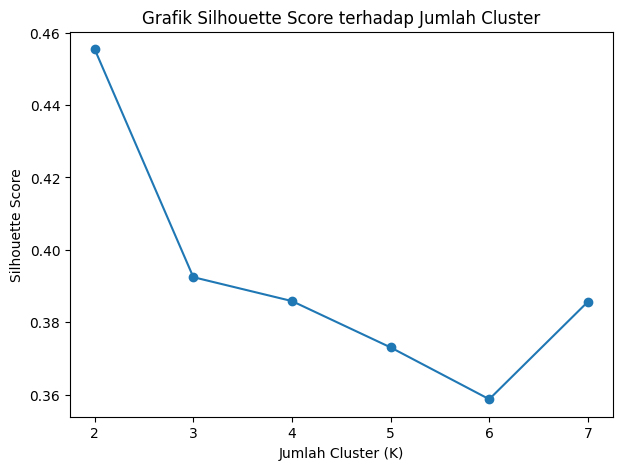

In [71]:
k_values = []
silhouette_scores = []

for k in range(2, 8):  # K = 2 sampai 7
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    labels_temp = kmeans_temp.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels_temp)
    k_values.append(k)
    silhouette_scores.append(score)

# Plot Silhouette vs K
plt.figure(figsize=(7,5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Grafik Silhouette Score terhadap Jumlah Cluster')
plt.show()
